In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import os
import sys
sys.path.append(os.path.abspath("../"))

In [21]:
import re
from src.orchestration.graph import graph
from langchain_core.messages import BaseMessage, HumanMessage

In [22]:
BASE_DIR = os.path.abspath(os.path.abspath("../"))

query = "Who modified the code last ?"
# query = "What does the program do?"
source_db = os.path.join(BASE_DIR, "data", "external", "uml-data")
repository_path = "/Users/yoseph/Work/Personal/keycloak"
github_id = "keycloak/keycloak"

In [23]:
def safe_get_content(value, label):
    if isinstance(value, list) and value:
        return value[-1].content
    if isinstance(value, BaseMessage):
        return value.content
    return f"{label}: PASS or not applicable"

def remove_think_block(text):
    return re.sub(r"<think>.*?</think>", "", text, flags=re.DOTALL)


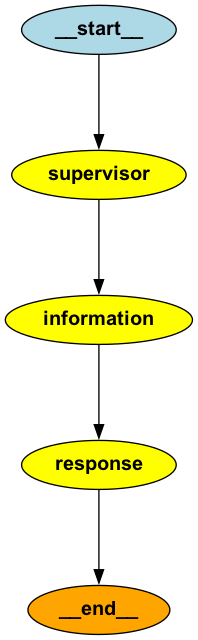

In [24]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

display(
    Image(
        graph.get_graph().draw_png()
    )
)

# Run Queries

In [25]:
result = graph.invoke({
            "user_query": [HumanMessage(query)],
            "source_db": source_db,
            "repository_path": repository_path,
            "github_url": github_id
            })

Git Started.
{'git_query': [HumanMessage(content='Who made the most recent commit to the codebase and what files were modified?', additional_kwargs={}, response_metadata={}, id='9730c417-04ad-45ce-bbe2-53d91c97bdd8')], 'repository_path': '/Users/yoseph/Work/Personal/keycloak', 'github_url': ['keycloak/keycloak']}
git log -1 --name-status
Git Done.
{'user_query': [HumanMessage(content='Who modified the code last ?', additional_kwargs={}, response_metadata={}, id='8b4ef471-f004-4762-b13f-088c9b45696d')], 'source_response': [], 'git_response': [AIMessage(content='commit ab01689aaa38a3c61eccd918816ff35f8bec0c67\nAuthor: Stian Thorgersen <stianst@gmail.com>\nDate:   Tue Mar 4 16:59:18 2025 +0100\n\n    Add basic TestApp to the new testsuite (#37815)\n    \n    Closes #37814\n    \n    Signed-off-by: stianst <stianst@gmail.com>\n\nM\ttest-framework/core/src/main/java/org/keycloak/testframework/CoreTestFrameworkExtension.java\nA\ttest-framework/core/src/main/java/org/keycloak/testframework/an

In [26]:
print(f"    User Query: {safe_get_content(result.get('user_query'), 'User Query')}")
print(f"    Source Query: {safe_get_content(result.get('source_query'), 'Source Query')}")
print(f"    Git Query: {safe_get_content(result.get('git_query'), 'Git Query')}")
print(f"    GitHub Query: {safe_get_content(result.get('github_query'), 'GitHub Query')}")
print(f"    Docs Query: {safe_get_content(result.get('docs_query'), 'Docs Query')}")

print("\nResponse:")
print(f"    Source Response: {safe_get_content(result.get('source_response'), 'Source Response')}")
print(f"    Git Response: {safe_get_content(result.get('git_response'), 'Git Response')}")
print(f"    GitHub Response: {safe_get_content(result.get('github_response'), 'GitHub Response')}")
print(f"    Docs Response: {safe_get_content(result.get('docs_response'), 'Docs Response')}")


    User Query: Who modified the code last ?
    Source Query: Source Query: PASS or not applicable
    Git Query: Who made the most recent commit to the codebase and what files were modified?
    GitHub Query: GitHub Query: PASS or not applicable
    Docs Query: Docs Query: PASS or not applicable

Response:
    Source Response: Source Response: PASS or not applicable
    Git Response: commit ab01689aaa38a3c61eccd918816ff35f8bec0c67
Author: Stian Thorgersen <stianst@gmail.com>
Date:   Tue Mar 4 16:59:18 2025 +0100

    Add basic TestApp to the new testsuite (#37815)
    
    Closes #37814
    
    Signed-off-by: stianst <stianst@gmail.com>

M	test-framework/core/src/main/java/org/keycloak/testframework/CoreTestFrameworkExtension.java
A	test-framework/core/src/main/java/org/keycloak/testframework/annotations/InjectHttpServer.java
A	test-framework/core/src/main/java/org/keycloak/testframework/http/HttpServerSupplier.java
A	test-framework/examples/tests/src/test/java/org/keycloak/test/exa

In [27]:
remove_think_block(result['final_response'].content)

'\n\nBased on the Git information provided, the last person who modified the code was Stian Thorgersen (stianst@gmail.com) on Tuesday, March 4, 2025. The modification was related to adding a basic TestApp to the new testsuite (PR #37815), which closed issue #37814.'